# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 33

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,5.000000,24,24.665665,4.8,4.933133,6.986341,4.783391,2.275485
560,Kelleher,Liverpool,45,2.000000,10,8.394995,5.0,4.197497,NaN,4.495519,1.978719
326,Dubravka,Newcastle Utd,48,7.894737,30,33.670173,3.8,4.264889,3.845363,4.255136,1.946646
12,Martínez,Aston Villa,54,32.156863,164,141.428441,5.1,4.398080,3.083174,4.388471,1.892632
213,Meslier,Leeds United,47,31.777778,143,127.381050,4.5,4.008495,4.276096,4.191338,1.848981
597,Sánchez,Brighton,46,21.951220,90,86.894283,4.1,3.958517,4.639960,3.857601,1.845668
417,Johnstone,West Brom,45,31.794872,124,121.396828,3.9,3.818126,6.165526,3.741285,1.799882
96,Pope,Burnley,55,30.222222,136,124.502904,4.5,4.119581,3.639777,4.169105,1.756595
245,Adrián,Liverpool,42,2.972973,11,10.560127,3.7,3.552043,NaN,3.850064,1.733219


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.683538,7.0,5.170884,NaN,4.988888,2.465122
277,Cancelo,Manchester City,59,24.117647,123,128.341552,5.1,5.321479,4.563273,5.341586,2.190818
273,Stones,Manchester City,51,20.166667,121,96.431427,6.0,4.781724,2.481636,4.835814,2.117383
75,Bernardo,Brighton,39,2.941176,5,11.807404,1.7,4.014517,NaN,3.853222,2.032830
109,Rüdiger,Chelsea,47,15.882353,81,67.826229,5.1,4.270540,6.047515,4.100255,1.969853
123,James,Chelsea,50,26.756757,99,117.251754,3.7,4.382136,2.714496,4.171424,1.959751
232,Chilwell,Chelsea,58,23.137255,118,107.264501,5.1,4.636008,7.924558,4.417040,1.924998
13,Chambers,Arsenal,45,5.000000,16,20.371809,3.2,4.074362,4.332378,4.257886,1.920673
283,Zinchenko,Manchester City,55,15.789474,60,69.198377,3.8,4.382564,6.229260,4.455501,1.868732


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,57,24.827586,144,130.293272,5.8,5.247923,1.924406,5.069799,2.198113
301,Lingard,West Ham,67,10.963855,91,61.638601,8.3,5.621982,6.228271,5.758818,2.171961
570,Raphinha,Leeds United,54,26.136364,115,115.301890,4.4,4.411551,5.573040,4.507660,1.898429
24,Saka,Arsenal,51,27.837838,103,117.832816,3.7,4.232829,3.606619,4.235100,1.874328
37,Grealish,Aston Villa,75,21.864407,129,111.395207,5.9,5.094820,NaN,4.873972,1.860365
302,Fernandes,Manchester Utd,115,32.985075,221,206.302532,6.7,6.254421,4.589478,6.135561,1.844328
272,De Bruyne,Manchester City,119,24.150943,128,152.938397,5.3,6.332605,5.570320,6.065893,1.835731
105,Jorginho,Chelsea,47,24.047619,101,94.965255,4.2,3.949050,2.437734,3.780212,1.821561
203,Harrison,Leeds United,54,30.697674,132,124.766025,4.3,4.064348,6.884712,4.151701,1.749017


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,65,33.000000,165,157.949124,5.0,4.786337,3.903423,4.845720,1.877356
388,Kane,Tottenham,118,29.863014,218,192.087861,7.3,6.432300,7.050000,6.655638,1.872515
437,Antonio,West Ham,64,20.930233,90,95.364562,4.3,4.556307,5.356667,4.629024,1.801038
506,Wilson,Newcastle Utd,65,23.800000,119,108.237474,5.0,4.547793,1.533333,4.437806,1.783791
665,Maja,Fulham,52,10.937500,35,44.020000,3.2,4.024686,3.175000,3.910714,1.764941
91,Wood,Burnley,63,27.906977,120,123.098737,4.3,4.411038,7.602674,4.571537,1.757400
224,Vardy,Leicester City,103,29.107143,163,161.447861,5.6,5.546675,3.927953,5.282654,1.728280
164,Calvert-Lewin,Everton,75,26.923077,140,126.757474,5.2,4.708135,4.100000,4.624945,1.719168
514,Watkins,Aston Villa,66,32.222222,145,141.783299,4.5,4.400171,4.260945,4.195400,1.712764


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,118,29.863014,218,192.087861,7.3,6.432300,6.655638,1.872515
272,De Bruyne,Manchester City,119,24.150943,128,152.938397,5.3,6.332605,6.065893,1.835731
302,Fernandes,Manchester Utd,115,32.985075,221,206.302532,6.7,6.254421,6.135561,1.844328
254,Salah,Liverpool,127,32.096774,199,189.200599,6.2,5.894692,6.222184,1.654090
301,Lingard,West Ham,67,10.963855,91,61.638601,8.3,5.621982,5.758818,2.171961
224,Vardy,Leicester City,103,29.107143,163,161.447861,5.6,5.546675,5.282654,1.728280
390,Son,Tottenham,95,32.096774,199,173.010387,6.2,5.390273,5.582263,1.748836
277,Cancelo,Manchester City,59,24.117647,123,128.341552,5.1,5.321479,5.341586,2.190818
271,Gündogan,Manchester City,57,24.827586,144,130.293272,5.8,5.247923,5.069799,2.198113


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,7.0,5.170884,NaN,5.061392,4.988888,2.465122
112,Arrizabalaga,Chelsea,47,5.000000,4.8,4.933133,6.986341,5.291171,4.783391,2.275485
271,Gündogan,Manchester City,57,24.827586,5.8,5.247923,1.924406,5.553463,5.069799,2.198113
277,Cancelo,Manchester City,59,24.117647,5.1,5.321479,4.563273,6.004210,5.341586,2.190818
301,Lingard,West Ham,67,10.963855,8.3,5.621982,6.228271,5.794554,5.758818,2.171961
273,Stones,Manchester City,51,20.166667,6.0,4.781724,2.481636,5.439432,4.835814,2.117383
75,Bernardo,Brighton,39,2.941176,1.7,4.014517,NaN,4.254065,3.853222,2.032830
560,Kelleher,Liverpool,45,2.000000,5.0,4.197497,NaN,3.830532,4.495519,1.978719
109,Rüdiger,Chelsea,47,15.882353,5.1,4.270540,6.047515,4.649287,4.100255,1.969853


In [10]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,next5_xP,valuePoints metric
id,,,,,,,,,,,
112,Arrizabalaga,Chelsea,47,5.000000,24,24.665665,4.8,4.933133,6.986341,4.783391,2.275485
233,Iheanacho,Leicester City,62,20.000000,88,77.412912,4.4,3.870646,6.924114,3.717123,1.554489
87,Barnes,Burnley,60,17.777778,48,57.220000,2.7,3.218625,6.650000,3.326153,1.313998
235,Barnes,Leicester City,66,25.200000,126,106.217378,5.0,4.214975,6.511535,4.066032,1.640677
388,Kane,Tottenham,118,29.863014,218,192.087861,7.3,6.432300,6.221991,6.655638,1.872515
91,Wood,Burnley,63,27.906977,120,123.098737,4.3,4.411038,6.151337,4.571537,1.757400
301,Lingard,West Ham,67,10.963855,91,61.638601,8.3,5.621982,5.893187,5.758818,2.171961
245,Adrián,Liverpool,42,2.972973,11,10.560127,3.7,3.552043,5.730734,3.850064,1.733219
259,Alexander-Arnold,Liverpool,76,30.975610,127,143.357769,4.1,4.628085,5.684043,5.007640,1.678783


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,118,29.863014,218,192.087861,7.3,6.432300,7.413832,1.872515
272,De Bruyne,Manchester City,119,24.150943,128,152.938397,5.3,6.332605,6.703374,1.835731
390,Son,Tottenham,95,32.096774,199,173.010387,6.2,5.390273,6.333620,1.748836
302,Fernandes,Manchester Utd,115,32.985075,221,206.302532,6.7,6.254421,6.096126,1.844328
277,Cancelo,Manchester City,59,24.117647,123,128.341552,5.1,5.321479,6.004210,2.190818
301,Lingard,West Ham,67,10.963855,91,61.638601,8.3,5.621982,5.794554,2.171961
271,Gündogan,Manchester City,57,24.827586,144,130.293272,5.8,5.247923,5.553463,2.198113
224,Vardy,Leicester City,103,29.107143,163,161.447861,5.6,5.546675,5.502459,1.728280
273,Stones,Manchester City,51,20.166667,121,96.431427,6.0,4.781724,5.439432,2.117383


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,118,29.863014,7.3,6.432300,7.413832,1.872515,17.3,6.5,23.8,0.796972
254,Salah,Liverpool,127,32.096774,6.2,5.894692,5.140787,1.654090,17.3,4.6,21.9,0.682312
224,Vardy,Leicester City,103,29.107143,5.6,5.546675,5.502459,1.728280,17.1,4.7,21.8,0.748957
202,Bamford,Leeds United,65,33.000000,5.0,4.786337,4.115645,1.877356,15.1,3.7,18.8,0.569697
302,Fernandes,Manchester Utd,115,32.985075,6.7,6.254421,6.096126,1.844328,13.8,10.5,24.3,0.736697
514,Watkins,Aston Villa,66,32.222222,4.5,4.400171,4.283746,1.712764,13.3,3.4,16.7,0.518276
251,Mané,Liverpool,117,29.782609,4.6,5.236357,4.566662,1.530863,13.2,4.3,17.5,0.587591
164,Calvert-Lewin,Everton,75,26.923077,5.2,4.708135,4.929010,1.719168,13.1,1.2,14.3,0.531143
68,Maupay,Brighton,60,30.588235,3.4,4.114844,4.777103,1.679878,12.5,3.4,15.9,0.519808


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week27,assists_week28,assists_week29,assists_week3,assists_week30,assists_week31,assists_week32,assists_week33,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,...,xG_week26,xG_week27,xG_week28,xG_week29,xG_week3,xG_week30,xG_week31,xG_week32,xG_week33,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 27,xPoints week 28,xPoints week 29,xPoints week 3,xPoints week 30,xPoints week 31,xPoints week 32,xPoints week 33,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,88.045276,3.339648,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,8,456,100.0,100.0,32.052363,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.3,-0.1,3.797316,5.274923,1.8,3.426123,4.226279,3.931484,0.797316,2.443213,6.797316,7.248999,4.671518,4.963273,2.598274,4.404777,4.986388,1.986388,3.090127,1.0,2.489826,NaN,NaN,NaN,NaN,1.199148,1.443213,6.68128,3.626279,3.797316,NaN,NaN,NaN,3.963273,3.461196,1.72834,2


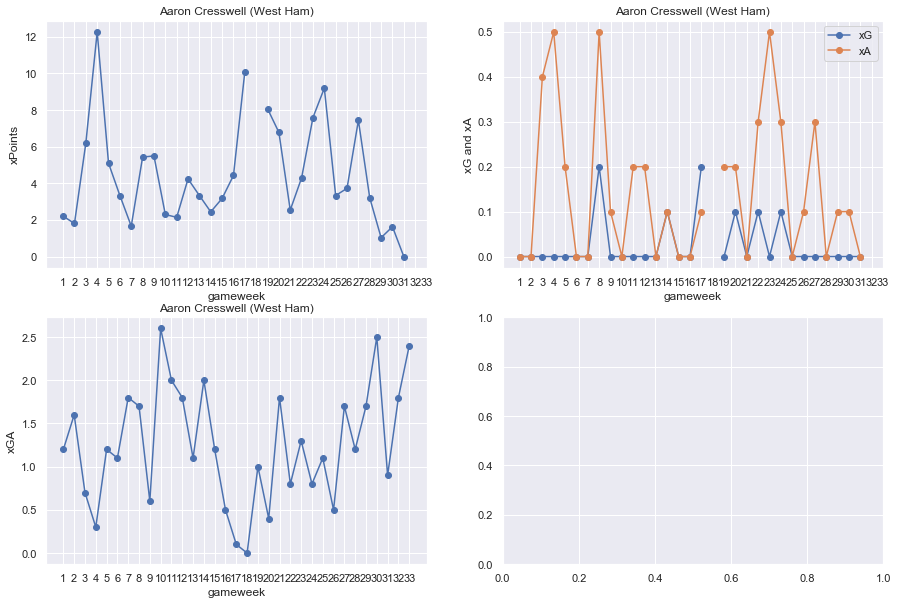

In [14]:
# find player index
name_string = 'Holding'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 435

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('Ihean'),'web_name']

id
233    Iheanacho
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,16,259,390,302,254,301,388,202,233] #vardy=224, grealish=37, mane=251
my_subs = [597,558,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 61.31930466235111
Expected points next gameweek: 62.865385801407825


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,54,32.156863,5.1,4.398080,3.083174,4.026516,4.386600,4.388471,1.892632
109,Rüdiger,Chelsea,47,15.882353,5.1,4.270540,6.047515,4.745934,4.649287,4.100255,1.969853
16,Holding,Arsenal,42,26.363636,3.3,3.339648,3.887022,3.172986,3.628452,3.541764,1.629582
259,Alexander-Arnold,Liverpool,76,30.975610,4.1,4.628085,7.789247,5.684043,4.047717,5.007640,1.678783
390,Son,Tottenham,95,32.096774,6.2,5.390273,4.970096,4.912650,6.333620,5.582263,1.748836
302,Fernandes,Manchester Utd,115,32.985075,6.7,6.254421,4.589478,5.266298,6.096126,6.135561,1.844328
254,Salah,Liverpool,127,32.096774,6.2,5.894692,6.877473,5.372828,5.140787,6.222184,1.654090
301,Lingard,West Ham,67,10.963855,8.3,5.621982,6.228271,5.893187,5.794554,5.758818,2.171961
388,Kane,Tottenham,118,29.863014,7.3,6.432300,7.050000,6.221991,7.413832,6.655638,1.872515



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,46,21.951220,4.1,3.958517,4.639960,4.374790,3.914435,3.857601,1.845668
558,Coufal,West Ham,47,29.166667,3.6,3.720835,2.947803,3.512945,4.054057,3.984579,1.716293
23,Smith Rowe,Arsenal,42,16.129032,3.1,3.209548,2.518633,2.671244,3.275535,3.236544,1.566099
74,White,Brighton,45,31.000000,3.0,3.243679,3.900621,3.972287,3.256780,3.130589,1.529085


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)